In [178]:
import numpy as np
from scipy.special import i0
from numba import jit
from scipy.stats import entropy as KL
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [172]:
# define non-central chi distribution in 2D
#@jit(nopython=True)
def chi_distribution(x, loc=0.0, scale=1.0, norm=False):
    """Probability density function of a non-central chi-distribution in two
        dimensions.
    :param x:
    :param loc: mean (location)
    :param scale: sigma parameter
    :param norm: Boolean if true the returned array is normalized to one
    :return: probability density
    """
    
    p = (x / (scale**2))* np.exp(-(x**2+loc**2)/(2*scale**2)) * i0(x*loc/(scale**2))
    
    if norm:
        p /= p.sum()
    return p

Test the distribution:

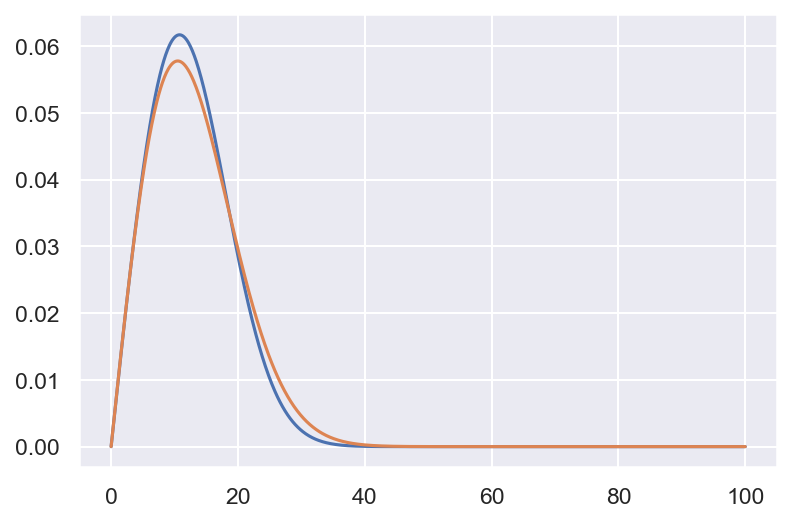

In [179]:
x = np.linspace(0,100,1000)
# figure 3E from Niekamp et al.
p1 = chi_distribution(x,8.5,7.9)
p2 = chi_distribution(x,0.3,10.5)
plt.plot(x,p1)
plt.plot(x,p2)
# slight differences arise

Scan parameter space of sigma at given mu.

In [180]:
mu = 5
sigma = np.linspace(0,20,101)

x = np.linspace(0,3*mu,1000)
res = np.zeros([len(sigma_to_mu),len(x)])
for i,sm in enumerate(sigma):
    res[:][i] = chi_distribution(x,mu,sm)
    res[:][i] /= np.max(res[:][i])

/Users/Anders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/Anders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/Anders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


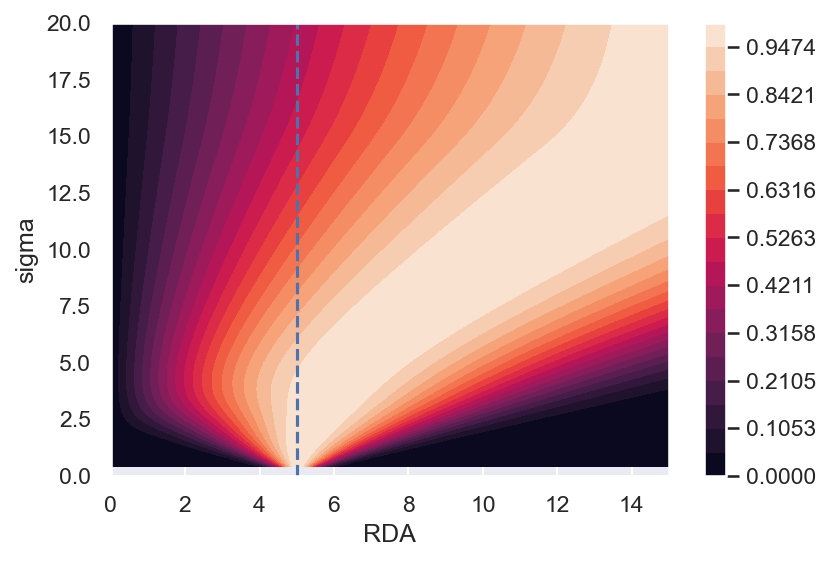

In [181]:
plt.contourf(x,sigma,res,levels=np.linspace(0,1,20))
plt.plot([mu,mu],[0,20],'--')
plt.xlabel('RDA')
plt.ylabel('sigma')
plt.colorbar()

For a given set of parameters, scan all combinations of mu and sigma for "similar" distributions as evaluated from the Kullback Leibler divergence.

In [185]:
mu_ref = 7
sigma_ref = 4

mu = np.linspace(0,3*mu_ref,100)
sigma = np.linspace(0,3*sigma_ref,101)

x = np.linspace(0,100,1000)
KL_div = np.zeros([len(mu),len(sigma)])
RMSE = np.zeros([len(mu),len(sigma)])
ref = chi_distribution(x,mu_ref,sigma_ref)
for i,m in enumerate(mu):
    for j,s in enumerate(sigma):
        KL_div[i][j] = KL(ref,chi_distribution(x,m,s))
        RMSE[i][j] = np.sqrt(np.sum((ref-chi_distribution(x,m,s))**2))#KL(ref,chi_distribution(x,m,s))

/Users/Anders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/Anders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/Anders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


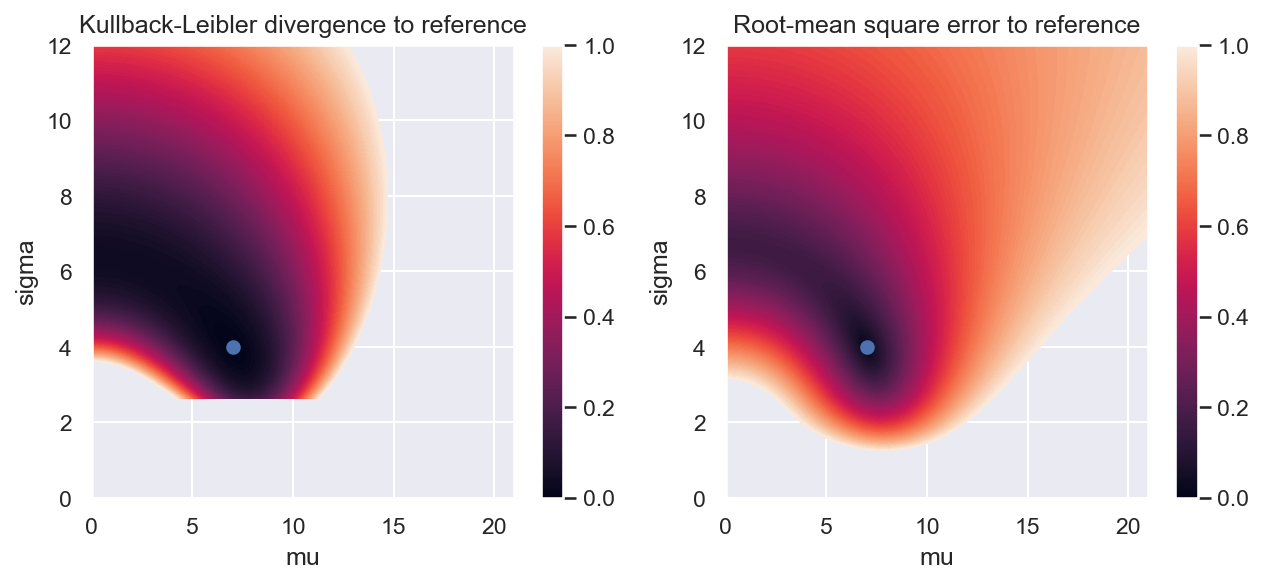

In [186]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.contourf(mu,sigma,KL_div.T,levels=np.linspace(0,1,100))
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Kullback-Leibler divergence to reference')
plt.scatter(mu_ref,sigma_ref)
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(mu,sigma,RMSE.T,levels=np.linspace(0,1,100))
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Root-mean square error to reference')
plt.scatter(mu_ref,sigma_ref)
plt.colorbar()